In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset\\engineered_title_netflix_dataset.csv")
df['date_added'] = pd.to_datetime(df["date_added"])

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,month_added,year_added,seasonly,duration_season,minutely,duration_minute,family,life,friend
0,s1,TV Show,3%,missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,...,In a future where the elite inhabit an island ...,August,2020,1,4,0,0,0.0,0.0,0.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,...,After a devastating earthquake hits Mexico Cit...,December,2016,0,0,1,93,0.0,1.0,0.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,...,"When an army recruit is found dead, his fellow...",December,2018,0,0,1,78,0.0,0.0,0.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,...,"In a postapocalyptic world, rag-doll robots hi...",November,2017,0,0,1,80,0.0,0.0,0.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,...,A brilliant group of students become card-coun...,January,2020,0,0,1,123,0.0,0.0,0.0


In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_added', 'year_added', 'seasonly', 'duration_season', 'minutely',
       'duration_minute', 'family', 'life', 'friend'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          7787 non-null   object        
 1   type             7787 non-null   object        
 2   title            7787 non-null   object        
 3   director         7787 non-null   object        
 4   cast             7787 non-null   object        
 5   country          7787 non-null   object        
 6   date_added       7787 non-null   datetime64[ns]
 7   release_year     7787 non-null   int64         
 8   rating           7787 non-null   object        
 9   duration         7787 non-null   object        
 10  listed_in        7787 non-null   object        
 11  description      7787 non-null   object        
 12  month_added      7787 non-null   object        
 13  year_added       7787 non-null   int64         
 14  seasonly         7787 non-null   int64  

In [5]:
df = df.drop(columns=["duration", "description"])

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,month_added,year_added,seasonly,duration_season,minutely,duration_minute,family,life,friend
0,s1,TV Show,3%,missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",August,2020,1,4,0,0,0.0,0.0,0.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,"Dramas, International Movies",December,2016,0,0,1,93,0.0,1.0,0.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,"Horror Movies, International Movies",December,2018,0,0,1,78,0.0,0.0,0.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...",November,2017,0,0,1,80,0.0,0.0,0.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,Dramas,January,2020,0,0,1,123,0.0,0.0,0.0


In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'listed_in', 'month_added', 'year_added',
       'seasonly', 'duration_season', 'minutely', 'duration_minute', 'family',
       'life', 'friend'],
      dtype='object')

# Type feature

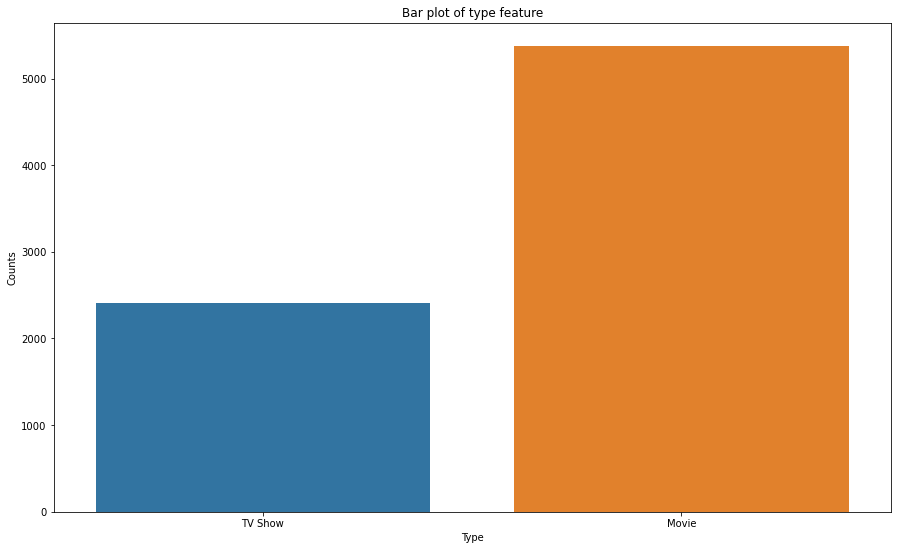

In [7]:
fig, ax = plt.subplots(figsize=(15, 9))

sns.countplot(data=df, x="type")

plt.title("Bar plot of type feature")
plt.xlabel("Type")
plt.ylabel("Counts")

plt.show()

# Director feature

In [8]:
df_d = df.copy()

for i in range(df_d.shape[0]):
    if df_d['director'][i] == "missing":
        df_d.loc[i, 'director'] = None

df_d = df_d.dropna()

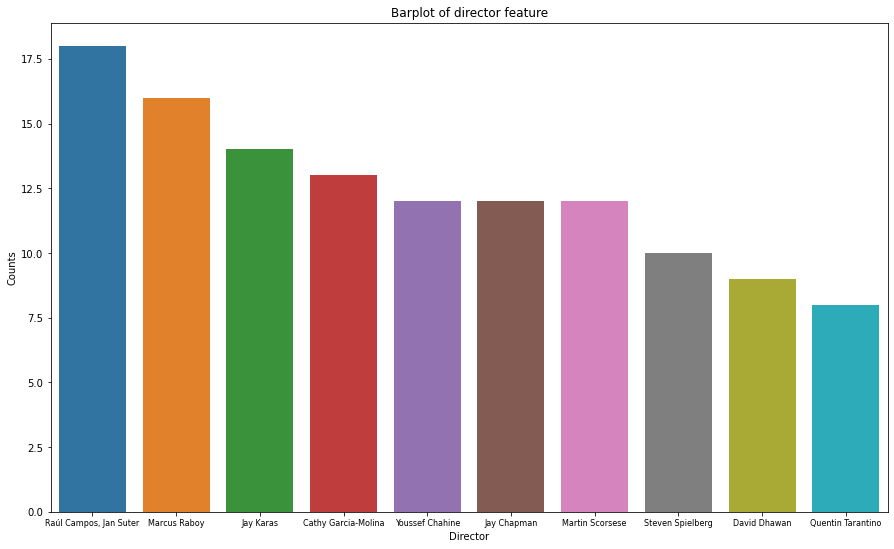

In [9]:
counts = df_d['director'].value_counts().sort_values(ascending=False)

df_d_10 = pd.DataFrame({'director':counts.index[:10],
                        'counts':counts.values[:10]})

fig = plt.subplots(figsize=(15, 9))

sns.barplot(data=df_d_10, x='director', y='counts')

plt.title("Barplot of director feature")
plt.xlabel("Director")
plt.ylabel("Counts")
plt.tick_params(axis='x', labelsize=8)

plt.show()

# Cast feature

In [10]:
casts = []

for cast in df["cast"]:
    casts.extend(cast.split(","))
    
casts = pd.Series(casts)
casts = casts.apply(lambda x: x.strip())
casts = list(casts)

In [11]:
cast, counts = np.unique(casts, return_counts=True)

cast_counts = pd.DataFrame(data={'cast':cast,
                                 'counts':counts})

cast_counts = cast_counts.sort_values('counts', ascending=False)
cast_counts = cast_counts.drop(index=cast_counts[cast_counts["cast"] == 'missing'].index[0])
cast_counts = cast_counts.iloc[:10]

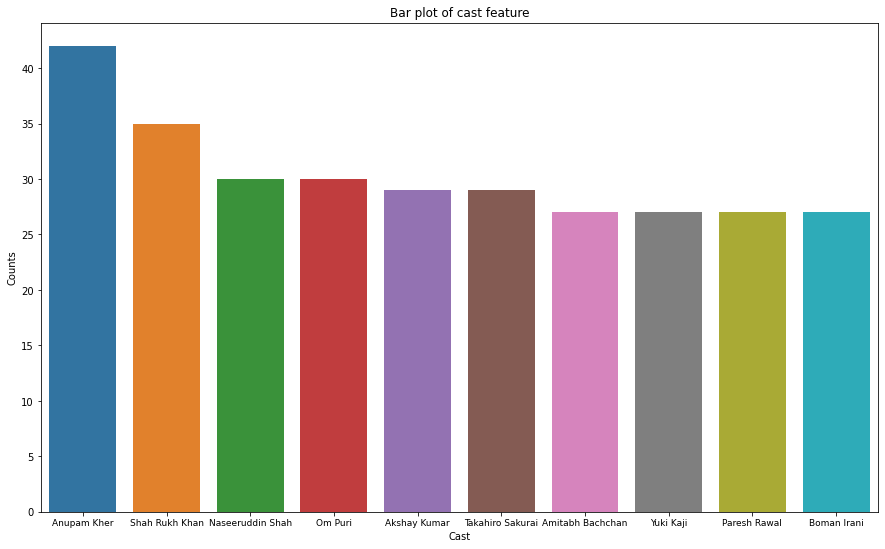

In [12]:
fig = plt.subplots(figsize=(15, 9))

sns.barplot(data=cast_counts, x='cast', y='counts')

plt.title("Bar plot of cast feature")
plt.xlabel("Cast")
plt.ylabel("Counts")
plt.tick_params(axis='x', labelsize=9)

plt.show()

# Country feature

In [13]:
countries = []

for country in df['country']:
    if ',' in country:
        countries.extend(country.split(","))
    else:
        countries.append(country)
    
countries = pd.Series(countries)
countries = countries.apply(lambda x: x.strip())
countries = list(countries)

In [14]:
country, counts = np.unique(countries, return_counts=True)

country_counts = pd.DataFrame(data={'country':country,
                                    'counts':counts})

country_counts = country_counts.sort_values('counts', ascending=False)
country_counts = country_counts.drop(index=country_counts[country_counts['country'] == 'missing'].index[0])
country_counts = country_counts.iloc[:10]

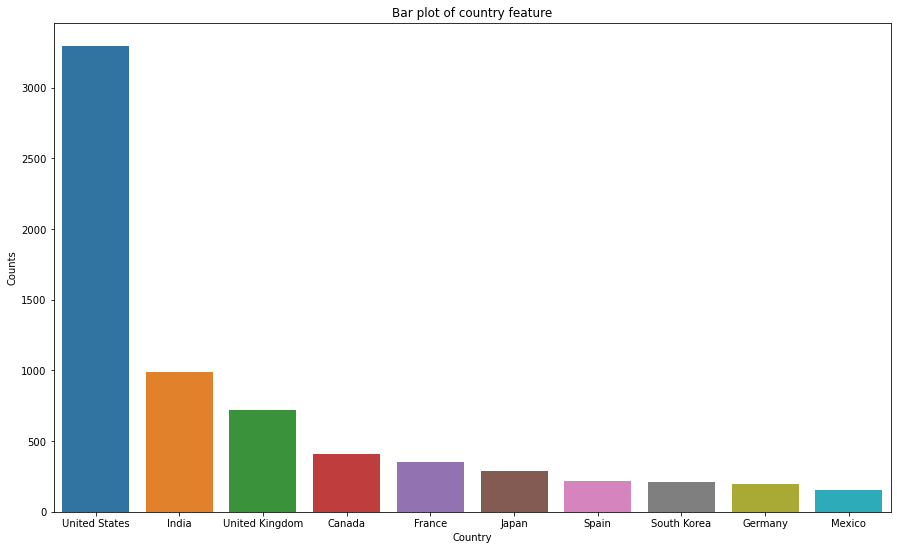

In [15]:
fig = plt.subplots(figsize=(15, 9))

sns.barplot(data=country_counts, x='country', y='counts')

plt.title("Bar plot of country feature")
plt.xlabel("Country")
plt.ylabel("Counts")

plt.show()

# date_added feature

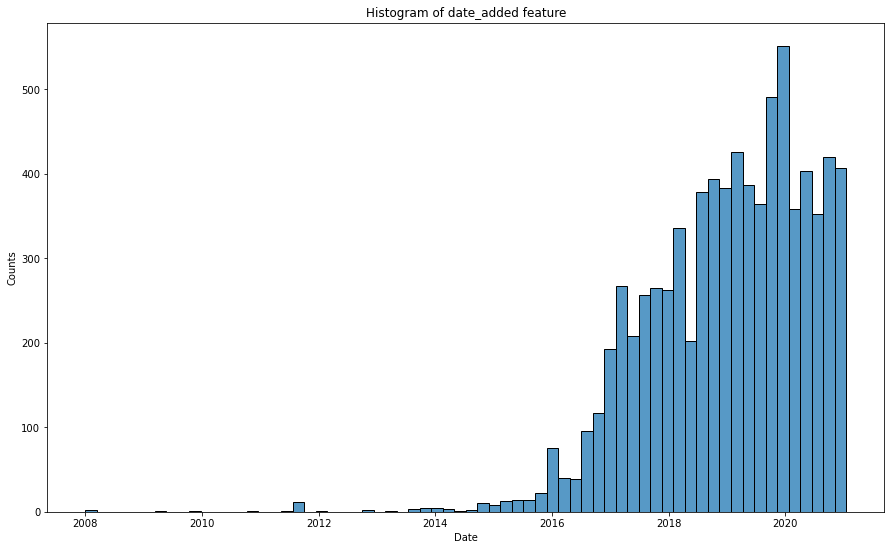

In [16]:
fig = plt.subplots(figsize=(15, 9))

sns.histplot(data=df, x='date_added')

plt.title("Histogram of date_added feature")
plt.xlabel("Date")
plt.ylabel("Counts")

plt.show()

# release_year feature

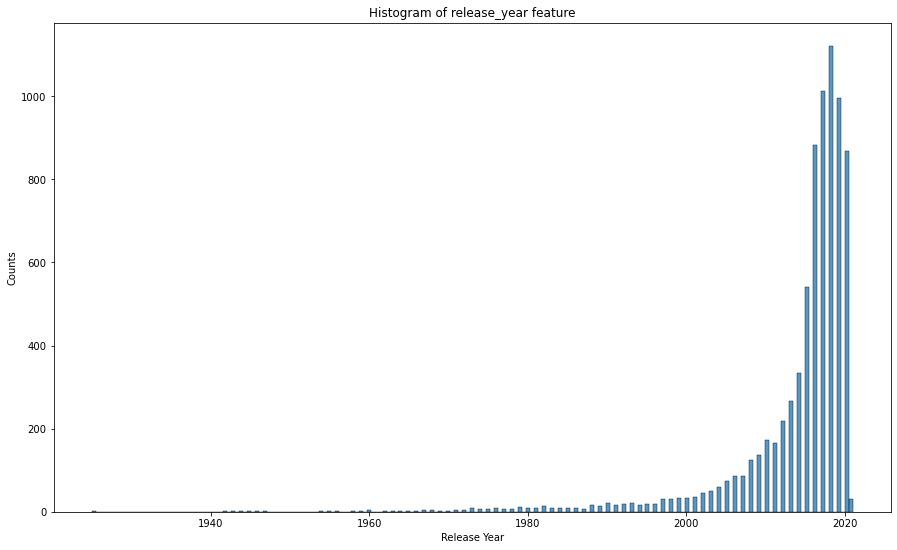

In [17]:
fig = plt.subplots(figsize=(15, 9))

sns.histplot(data=df, x='release_year')

plt.title("Histogram of release_year feature")
plt.xlabel("Release Year")
plt.ylabel("Counts")

plt.show()

# Rating feature

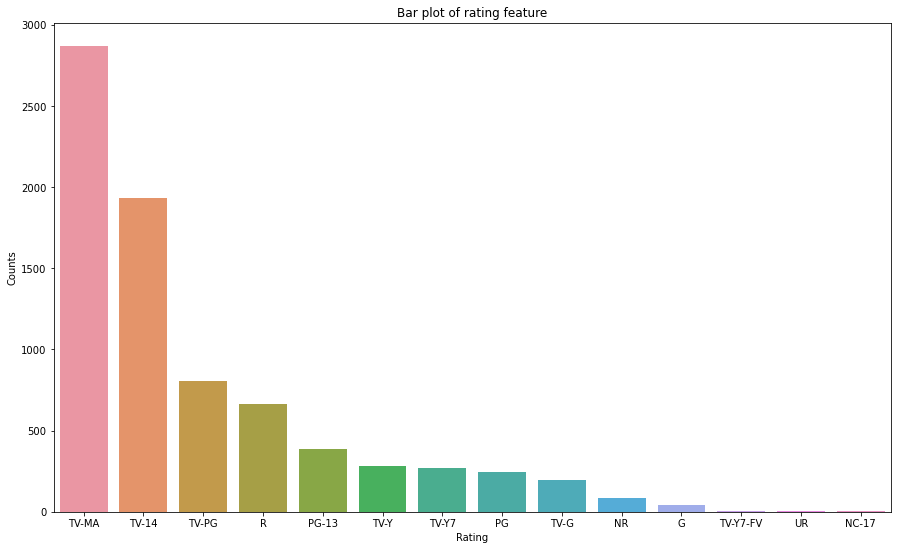

In [18]:
fig = plt.subplots(figsize=(15, 9))

sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)

plt.title("Bar plot of rating feature")
plt.xlabel("Rating")
plt.ylabel("Counts")

plt.show()

# listed_in feature

In [19]:
genres = []

for genre in df['listed_in']:
    if "," in genre:
        genres.extend(genre.split(","))
    else:
        genres.append(genre)
        
genres = pd.Series(genres)
genres = genres.apply(lambda x: x.strip())
genres = list(genres)

In [20]:
genre, count = np.unique(genres, return_counts=True)

genre_counts = pd.DataFrame(data={'genre':genre,
                                  'counts':count})

genre_counts = genre_counts.sort_values('counts', ascending=False)
genre_counts = genre_counts.iloc[:10]

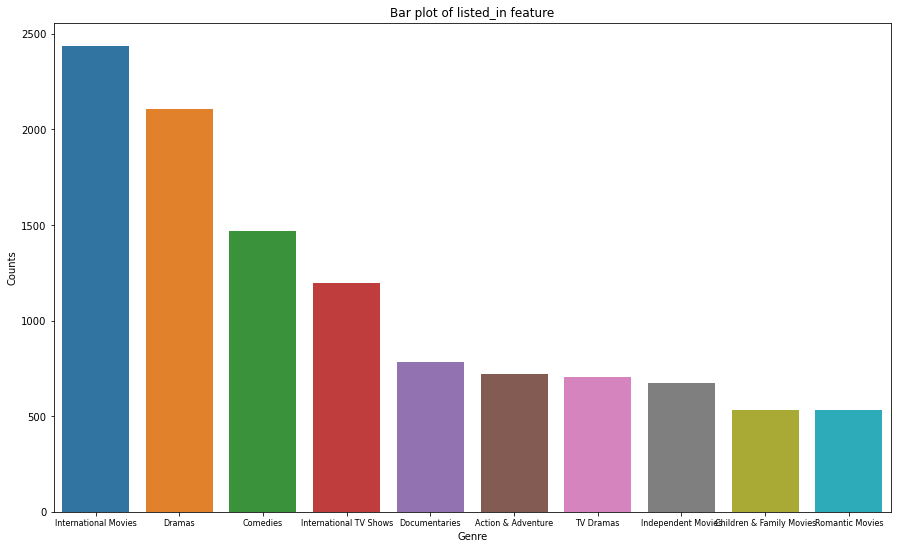

In [21]:
fig = plt.subplots(figsize=(15, 9))

sns.barplot(data=genre_counts, x='genre', y='counts')

plt.title("Bar plot of listed_in feature")
plt.xlabel("Genre")
plt.ylabel("Counts")
plt.tick_params(axis='x', labelsize=8)

plt.show()

# month_added feature

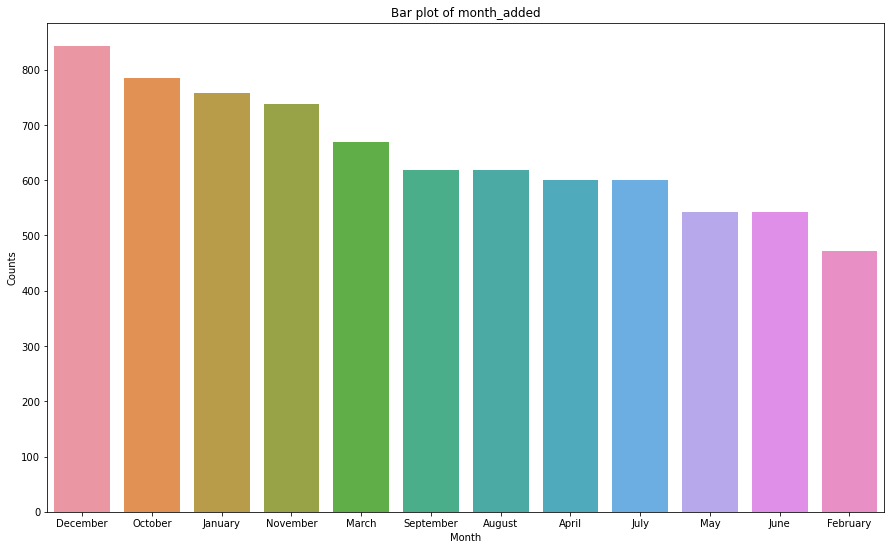

In [22]:
fig = plt.subplots(figsize=(15, 9))

sns.countplot(data=df, x='month_added', order=df['month_added'].value_counts().index)

plt.title("Bar plot of month_added")
plt.xlabel("Month")
plt.ylabel("Counts")

plt.show()

# year_added feature

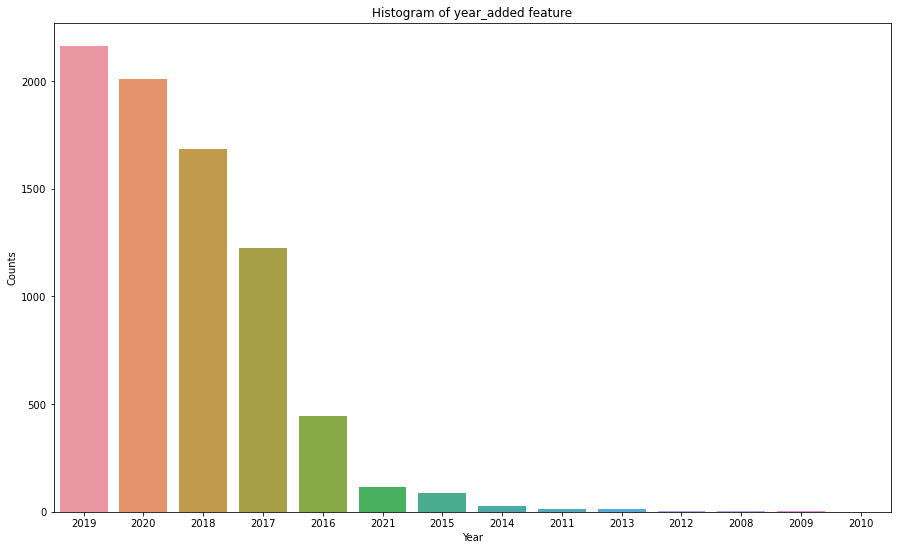

In [23]:
fig = plt.subplots(figsize=(15, 9))

sns.countplot(data=df, x='year_added', order=df['year_added'].value_counts().index)

plt.title("Histogram of year_added feature")
plt.xlabel("Year")
plt.ylabel("Counts")

plt.show()

For seasonly, minutely features are the same count as type feature

# duration_season feature

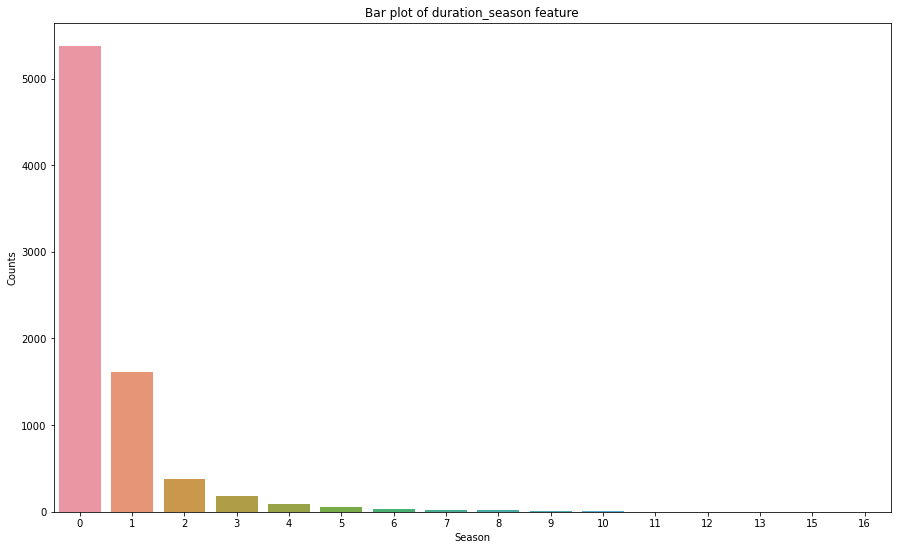

In [24]:
fig = plt.subplots(figsize=(15, 9))

sns.countplot(data=df, x='duration_season')

plt.title("Bar plot of duration_season feature")
plt.xlabel("Season")
plt.ylabel("Counts")

plt.show()

for 0 season is about movie type

# duration_minute feature 

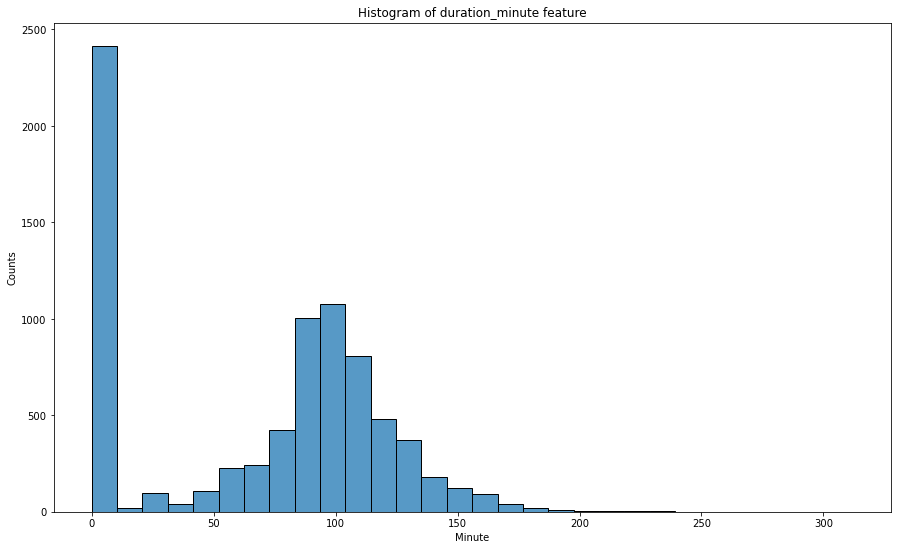

In [25]:
fig = plt.subplots(figsize=(15, 9))

sns.histplot(data=df, x='duration_minute')

plt.title("Histogram of duration_minute feature")
plt.xlabel("Minute")
plt.ylabel("Counts")

plt.show()

for 0 minute is about tv show type

# plots feature

In [26]:
plots_features = ['family', 'life', 'friend']

for feature in plots_features:
    df[feature] = df[feature].apply(lambda x: "Yes" if x == 1 else "NO")

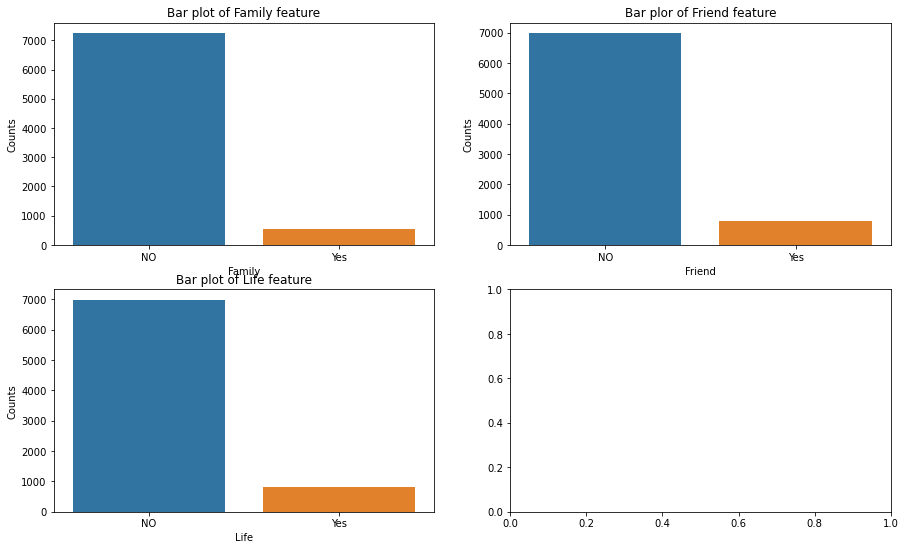

In [27]:
fig, ax = plt.subplots(figsize=(15, 9), nrows=2, ncols=2)

plots_features = ['family', 'life', 'friend']
for i in range(len(plots_features)):
    if i < 2:
        sns.countplot(data=df, x=plots_features[i], ax=ax[i][0])
        
        ax[i][0].set_title(f"Bar plot of {plots_features[i].capitalize()} feature")
        ax[i][0].set_xlabel(plots_features[i].capitalize())
        ax[i][0].set_ylabel("Counts")
    
    else:
        i_ = i - 2
        sns.countplot(data=df, x=plots_features[i], ax=ax[i_][1])
        
        ax[i_][1].set_title(f"Bar plor of {plots_features[i].capitalize()} feature")
        ax[i_][1].set_xlabel(plots_features[i].capitalize())
        ax[i_][1].set_ylabel("Counts")
        
plt.show()

# Conclusion

## Director feature analysis

In the director feature there are most common directors in this dataset are Raul compos and Jan suter, Marcus Raboy, Jay Karas. Unfortunately in this dataset there are a lot of missing directors like 30% of missing directors in this dataset.

## Cast feature analysis

In the cast feature there are most common casts in this dataset are Anupam Kher, Shah Rukh Khan, Naseeruddin Shah. Unfortunately in this dataset there are a lot of missing directors like 9% of missing directors in this dataset 

## Country feature analysis

In the country feature there are most common country where the movies or tv shows produced are United States, India, United Kingdom according to this dataset

## Date added feature analysis

In the date added feature there are a lot of movies and tv shows that added in netflix mostly in year 2019 - 2020, there are a lot of movies and tv shows added according to this dataset

## Release year feature analysis

In the release year feature there are a lot of movies and tv shows release in year 2016 - 2020, there are a lot of movies and tv shows release according to this dataset

## Rating feature analysis

In the rating feature there are a lot of movies and tv shows that rating for TV-MA, TV-14, TV-PG, there are a lot of movies and tv shows are for person that over 18, there are a lot of movies and tv shows are not good for kid less than 14, there are a lot of movies and tv shows are not good for kid. So, in this analysis we can conclude that movies and tv shows in netflix are for adults and older, not good for kid according to this dataset

## Listed in feature analysis

In the listed in feature or genre feature there are a lot of movies and tv shows are genre International TV Movies, Drama, Comedies. So, in this analysis we can conclude that there are a lot International TV Movies, Drama, Comedies according to this dataset

## Month added feature analysis

In the month added feature there are a lot of movies and tv shows are added in December, October, January. So, the movies that most likely added in netflix are in winter season and in autumn season according to this dataset

## Year added feature analysis

In the year added feature there are a lot of movies and tv shows are added in 2019, 2020, 2018 according to this dataset

## Duration season feature analysis

In the duration season feature there are a lot of duration from tv shows type that most are 1 - 3 season according to this dataset

## Duration minute feature analysis

In the duration minute feature there are a lot of duration from movies type that most are 90 - 120 minutes according to this dataset

## Plots feature analysis

In the plots feature there are a lot of movies that have various plots or story but most are about family, life, friend according to this dataset

# Top Actors, Directores, Genres and Countries

### 1. For top Actors are Anupam Kher, Shah Rukh Khan, Naseeruddin Shah
### 2. For top Directores are Raul compos and Jan suter, Marcus Raboy, Jay Karas
### 3. For top Genres are International TV Movies, Drama, Comedies
### 4. For top Countries are United States, India, United Kingdom